# Operador Matricial Diferenciacion e Integracion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("white")

## Operador Diferencial

- Para representar el operador cinetico.
- En esta seccion, nuestro objetivo es diferenciar una curva sinusoidal, representada como una funcion de cuadricula de la siguiente manera:

In [3]:
n_grid = 101 # Cantidad de divisiones que haremos
x_min = -10 # Rango de x, minimo
x_max = 10 # Rando de x, maximo
x = np.linspace(x_min, x_max, n_grid) # A las divisiones las haremos entre x_min y x_max

In [4]:
f = x*x
g = np.power(x, 3)

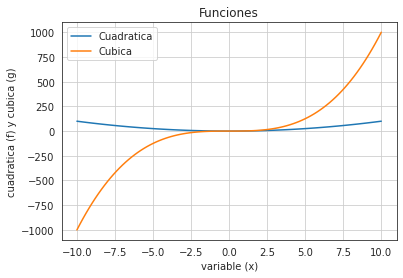

In [5]:
plt.grid()
plt.xlabel('variable (x)')
plt.ylabel('cuadratica (f) y cubica (g)')
plt.title('Funciones')
plt.plot(x, f, label = 'Cuadratica')
plt.plot(x, g, label = 'Cubica')
plt.legend()
plt.show()

In [6]:
# Veamos que hace este metodo de numpy
np.eye(5, k = 1) # Crea una matriz 5x5 con unos en la diagonal k = 1

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

## Aqui definimos el Operador Diferenciacion
Definimos el Operador Matricial Diferenciacion de tamano n_grid x n_grid, cuyo mallado tiene un tamano h = x[1] - x[0]

In [7]:
h = x[1] - x[0] # ESpaciado entre dos divisiones del grillado
Dv = -np.eye(n_grid, k = 0) + np.eye(n_grid, k = 1)
Df = Dv / h
print(1/h)

5.000000000000018


## Prueba del Operador Diferenciacion

In [8]:
f_1 = Df @ f

In [9]:
g_1 = Df @ g

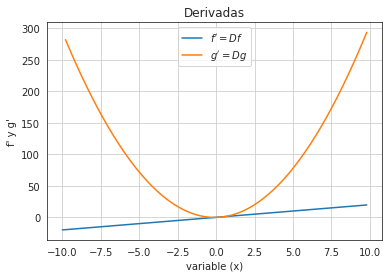

In [10]:
plt.plot(x[:-1], f_1[:-1], label = "$f' = Df$")
plt.plot(x[1:-1], g_1[1:-1], label = "$g' = Dg$")
plt.legend()
plt.grid()
plt.xlabel('variable (x)')
plt.ylabel("f' y g'")
plt.title("Derivadas")
plt.show()

## Realicemos la segunda derivada

### Diferenciacion de segundo orden
- Del mismo modo que el primer pedido:

$$ D_{ij}^{2} = \frac {\delta_{i+1,\ j} - 2 \delta_{i,\ j} + \delta_{i-1,\ j}}{h^{2}} $$

- Esto podria escribirse con el primer pedido $D_{ij}$, de la siguiente manera (tenga cuidado con la transposicion):

$$ D_{ij}^{2} = - D_{ik} D_{kj} $$

- La derivada puede no estar bien definida al final de la cuadricula.

In [11]:
f_2 = Df @ f_1
g_2 = Df @ Df @ g

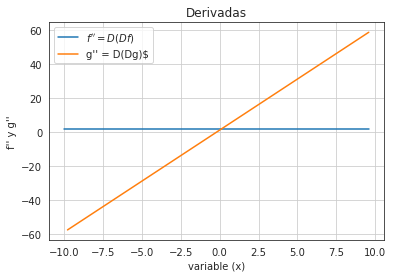

In [12]:
plt.plot(x[:-2], f_2[:-2], label = "$f'' = D(Df)$")
plt.plot(x[1:-2], g_2[1:-2], label = "g'' = D(Dg)$")
plt.legend()
plt.grid()
plt.xlabel('variable (x)')
plt.ylabel("f'' y g''")
plt.title('Derivadas')
plt.show()

In [13]:
dimen = (n_grid, n_grid) # Aqui definimos una dupla con los valores n_grid
mataux = np.ones(dimen) # Aqui creamos una matriz n_grid x n_grid llenas de unos

In [14]:
It = -np.triu(mataux, k = 0)
print(It)

[[-1. -1. -1. ... -1. -1. -1.]
 [-0. -1. -1. ... -1. -1. -1.]
 [-0. -0. -1. ... -1. -1. -1.]
 ...
 [-0. -0. -0. ... -1. -1. -1.]
 [-0. -0. -0. ... -0. -1. -1.]
 [-0. -0. -0. ... -0. -0. -1.]]


In [15]:
H = np.random.rand(4, 4)

In [16]:
Hinv = np.linalg.inv(H)
R = Hinv @ H
print(R)

[[ 1.00000000e+00  3.46381253e-16  2.45779749e-16  3.95843374e-16]
 [ 2.16302895e-16  1.00000000e+00 -1.21748069e-17  1.19167009e-16]
 [-3.87251366e-16 -2.33842509e-16  1.00000000e+00 -3.29832257e-16]
 [ 1.20753787e-16  4.68371872e-16  1.14038846e-17  1.00000000e+00]]


In [17]:
print(H @ Hinv)

[[ 1.00000000e+00  7.91234460e-17  6.58694258e-16  1.80315898e-16]
 [-1.48292812e-16  1.00000000e+00  2.69980916e-16  1.83782577e-16]
 [ 2.91498856e-19  8.93443966e-17  1.00000000e+00 -4.82856112e-17]
 [-7.37361357e-17  3.91731045e-16  5.88006118e-17  1.00000000e+00]]


```numpy.eye(N, M = Ninguno, k = 0, dtype = <clase 'float'>, orden = 'C')```  
Devolucion: ndarray de forma (N, M)  

Una matriz donde todos los elementos son iguales a cero, excepto la diagonal k, cuyos valores son iguales a uno.

In [18]:
# D2 = D.dot(-D.T)
Df2 = - Df @ Df.T
Df2[-1,-1] = Df2[0, 0] # Aqui revisamos las condiciones de contorno del Operador

### Comprobacion
**Derivadas de la funcion cuadratica**

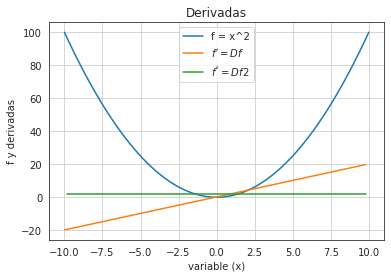

In [19]:
plt.plot(x, f, label = "f = x^2")
plt.plot(x[:-1], Df.dot(f)[:-1], label = "$f' = Df$")
plt.plot(x[1:-1], Df2.dot(f)[1:-1], label = "$f^{''} = Df2$")
plt.legend()
plt.grid()
plt.xlabel("variable (x)")
plt.ylabel("f y derivadas")
plt.title("Derivadas")
plt.show()

### Derivadas de la funcion cubica

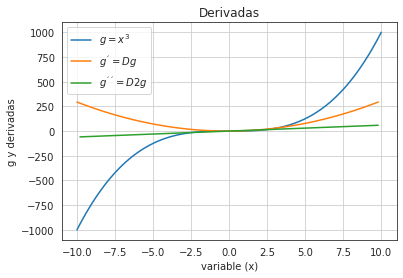

In [22]:
sns.set_style("white")
plt.plot(x, g, label="$g = x^3$")
plt.plot(x[:-1], Df.dot(g)[:-1], label = "$g^´ = Dg$")
plt.plot(x[1:-1], Df2.dot(g)[1:-1], label = "$g^{´´} = D2g$")
plt.legend()
plt.grid()
plt.xlabel('variable (x)')
plt.ylabel('g y derivadas')
plt.title('Derivadas')
plt.show()

## Operador Integracion
Crearemos de nuevo el operador Diferencial de una manera mas simple

In [23]:
n_grid = 51 # Cantidad de divisiones que haremos
x_min = 0 # Rango de x, minimo
x_max = 10 # Rando de x, maximo
x = np.linspace(x_min, x_max, n_grid) # A las divisiones las haremos entre x_min y x_max

In [26]:
h = x[1] - x[0] # Espaciado entre dos divisiones del grillado
Df = -np.eye(n_grid, k = 0) + np.eye(n_grid, k = 1)
Df = Df / h
print(1/h)

5.0


In [27]:
# Comprobamos que funciones
f_1 = 3.5 * np.sin(x)
f_2 = 3.5 * np.sin(x+1.5)

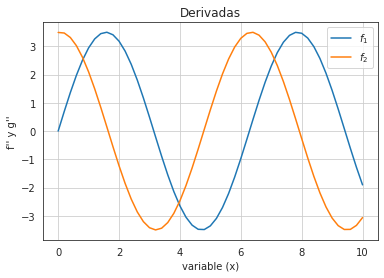

In [28]:
sns.set_style("white")
plt.plot(x, f_1, label = "$f_1$")
plt.plot(x[:], f_2[:], label = "$f_2$")
plt.legend()
plt.grid(which = 'both')
plt.xlabel('variable (x)')
plt.ylabel("f'' y g''")
plt.title("Derivadas")
plt.show()

## Mediante la inversion del Operador Matricial de Diferenciacion, obtenemos el Operador Matricial de Integracion

In [29]:
Int = np.linalg.inv(Df)

In [30]:
f_1 = 3.5 * np.sin(x)
F_1 = Int @ f_1 + 2.7 # 2.7 es una constante de Integracion.

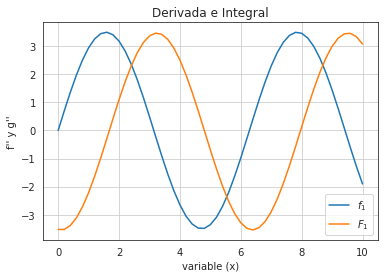

In [31]:
sns.set_style("white")
plt.plot(x, f_1, label = "$f_1$")
plt.plot(x, F_1, label = "$F_1$")
plt.legend()
plt.grid(which = "both")
plt.xlabel("variable (x)")
plt.ylabel("f'' y g''")
plt.title("Derivada e Integral")
plt.show()

In [32]:
f_1 = x * 0.5 - 1 # x ** 2 + x * 0.5 -6
F_1 = Int @ f_1

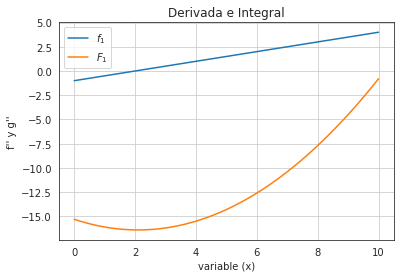

In [33]:
sns.set_style("white")
plt.plot(x, f_1, label = "$f_1$")
plt.plot(x, F_1, label = "$F_1$")
plt.legend()
plt.grid(which = "both")
plt.xlabel("variable (x)")
plt.ylabel("f'' y g''")
plt.title("Derivada e Integral")
plt.show()